In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-dataset/telecom_churn.csv


In [2]:
df=pd.read_csv('/kaggle/input/telecom-churn-dataset/telecom_churn.csv')

In [3]:
df.shape

(243553, 14)

In [4]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [5]:
df.tail()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0
243552,243553,BSNL,F,37,Telangana,Hyderabad,139086,2023-05-04,0,144297,61,7,3384,0


In [6]:
df=df.drop(columns='customer_id')

In [7]:
df=df.drop(columns='pincode')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   telecom_partner       243553 non-null  object
 1   gender                243553 non-null  object
 2   age                   243553 non-null  int64 
 3   state                 243553 non-null  object
 4   city                  243553 non-null  object
 5   date_of_registration  243553 non-null  object
 6   num_dependents        243553 non-null  int64 
 7   estimated_salary      243553 non-null  int64 
 8   calls_made            243553 non-null  int64 
 9   sms_sent              243553 non-null  int64 
 10  data_used             243553 non-null  int64 
 11  churn                 243553 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 22.3+ MB


## **DATA PREPARATION**
1. **Data Cleaning**
2. **Data Exploration**
3. **Data Spliting** 
4. **Model Training**
5. **Improve The Model**

**1. Data Cleaning**

In [9]:
df.isnull().sum()

telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['date_of_registration'].value_counts().unique()

array([200, 199,   1])

In [12]:
len(df['date_of_registration'].unique())

1220

In [13]:
# create a new column, date_parsed, with the parsed dates
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], format='%Y-%m-%d')

In [14]:
# Method 1: Timestamp representation
df['timestamp'] = df['date_of_registration'].astype(np.int64)

In [15]:
# Method 2: Numeric features
df['year'] = df['date_of_registration'].dt.year
df['month'] = df['date_of_registration'].dt.month
df['day'] = df['date_of_registration'].dt.day
df['hour'] = df['date_of_registration'].dt.hour
df['minute'] = df['date_of_registration'].dt.minute
df['second'] = df['date_of_registration'].dt.second

In [16]:
# Method 3: Cyclic encoding
df['hour_sin'] = np.sin(2 * np.pi * df['date_of_registration'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['date_of_registration'].dt.hour / 24)
df['month_sin'] = np.sin(2 * np.pi * df['date_of_registration'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['date_of_registration'].dt.month / 12)

In [17]:
# Method 4: Time elapsed features
reference_date = pd.to_datetime('2023-01-01')  # Choose your reference point
df['date_of_registration(seconds before)'] = (reference_date-df['date_of_registration']).dt.total_seconds()

In [18]:
pd.set_option('display.max_columns',None)

In [19]:
df.head()

,telecom_partner,gender,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,timestamp,year,month,day,hour,minute,second,hour_sin,hour_cos,month_sin,month_cos,date_of_registration(seconds before)
0,Reliance Jio,F,25,Karnataka,Kolkata,2020-01-01,4,124962,44,45,-361,0,1577836800000000000,2020,1,1,0,0,0,0.0,1.0,0.5,0.866025,94694400.0
1,Reliance Jio,F,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0,1577836800000000000,2020,1,1,0,0,0,0.0,1.0,0.5,0.866025,94694400.0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1,1577836800000000000,2020,1,1,0,0,0,0.0,1.0,0.5,0.866025,94694400.0
3,BSNL,M,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1,1577836800000000000,2020,1,1,0,0,0,0.0,1.0,0.5,0.866025,94694400.0
4,BSNL,F,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0,1577836800000000000,2020,1,1,0,0,0,0.0,1.0,0.5,0.866025,94694400.0


In [20]:
df=df.drop(columns=['date_of_registration','timestamp','year','month','day','hour','minute','second','hour_sin','month_sin','month_cos','timestamp'])

In [21]:
df=df.drop(columns='hour_cos')

In [22]:
df.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,date_of_registration(seconds before)
0,Reliance Jio,F,25,Karnataka,Kolkata,4,124962,44,45,-361,0,94694400.0
1,Reliance Jio,F,55,Mizoram,Mumbai,2,130556,62,39,5973,0,94694400.0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,0,148828,49,24,193,1,94694400.0
3,BSNL,M,46,Tamil Nadu,Kolkata,1,38722,80,25,9377,1,94694400.0
4,BSNL,F,26,Tripura,Delhi,2,55098,78,15,1393,0,94694400.0


In [23]:
df.shape

(243553, 12)

In [24]:
num_var=[]
cat_var=[]

In [25]:
for i in df:
    if df[i].dtype=='object':
        cat_var.append(i)
        
for i in df:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        num_var.append(i)        

In [26]:
cat_var,num_var

(['telecom_partner', 'gender', 'state', 'city'],
 ['age',
  'num_dependents',
  'estimated_salary',
  'calls_made',
  'sms_sent',
  'data_used',
  'churn',
  'date_of_registration(seconds before)'])

**2. Data Explorations**

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


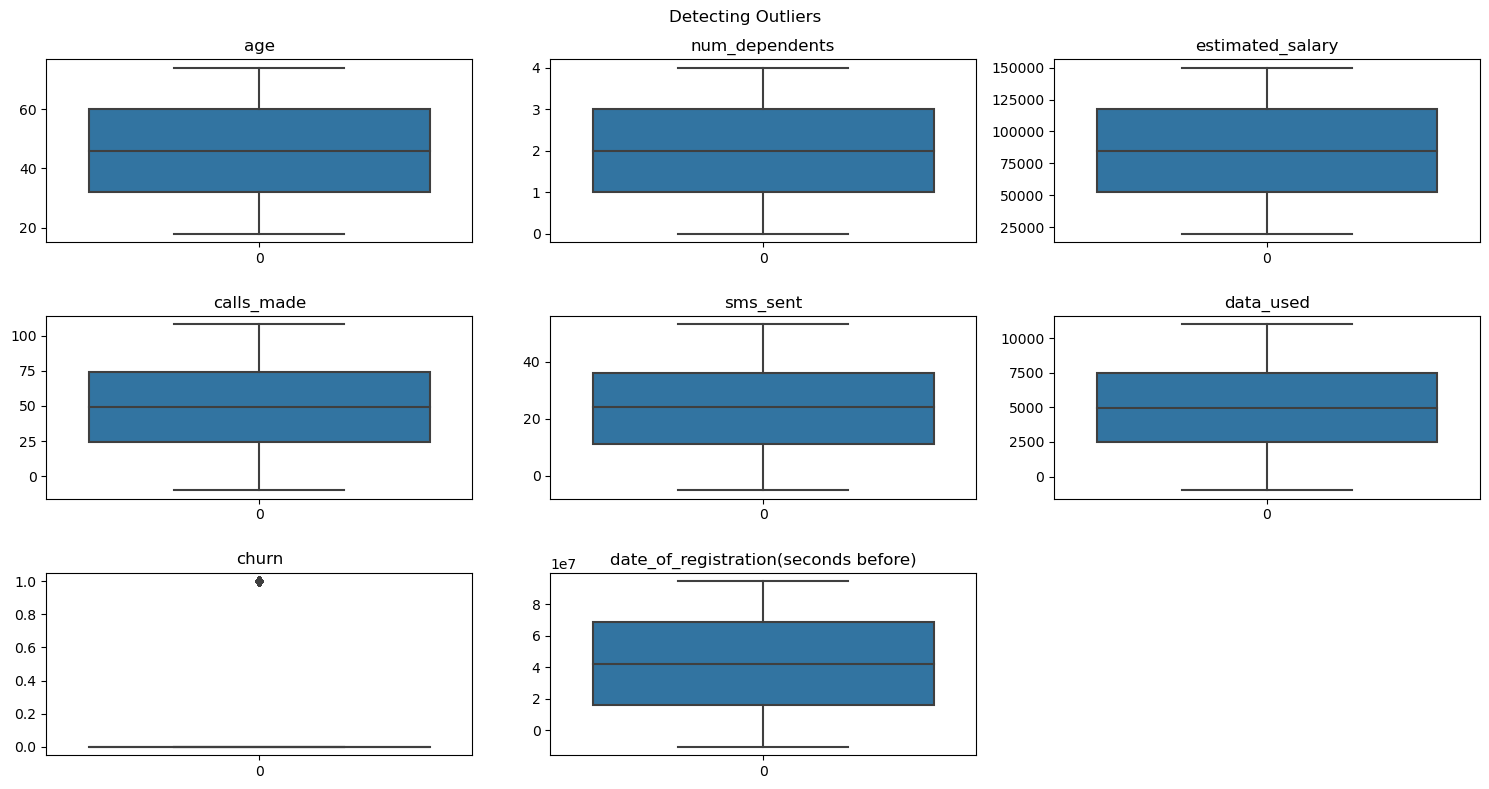

In [28]:
plt.figure(figsize=(15,8))
for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[var])
    plt.title(var)
    
plt.suptitle("Detecting Outliers")
plt.tight_layout()
plt.show()

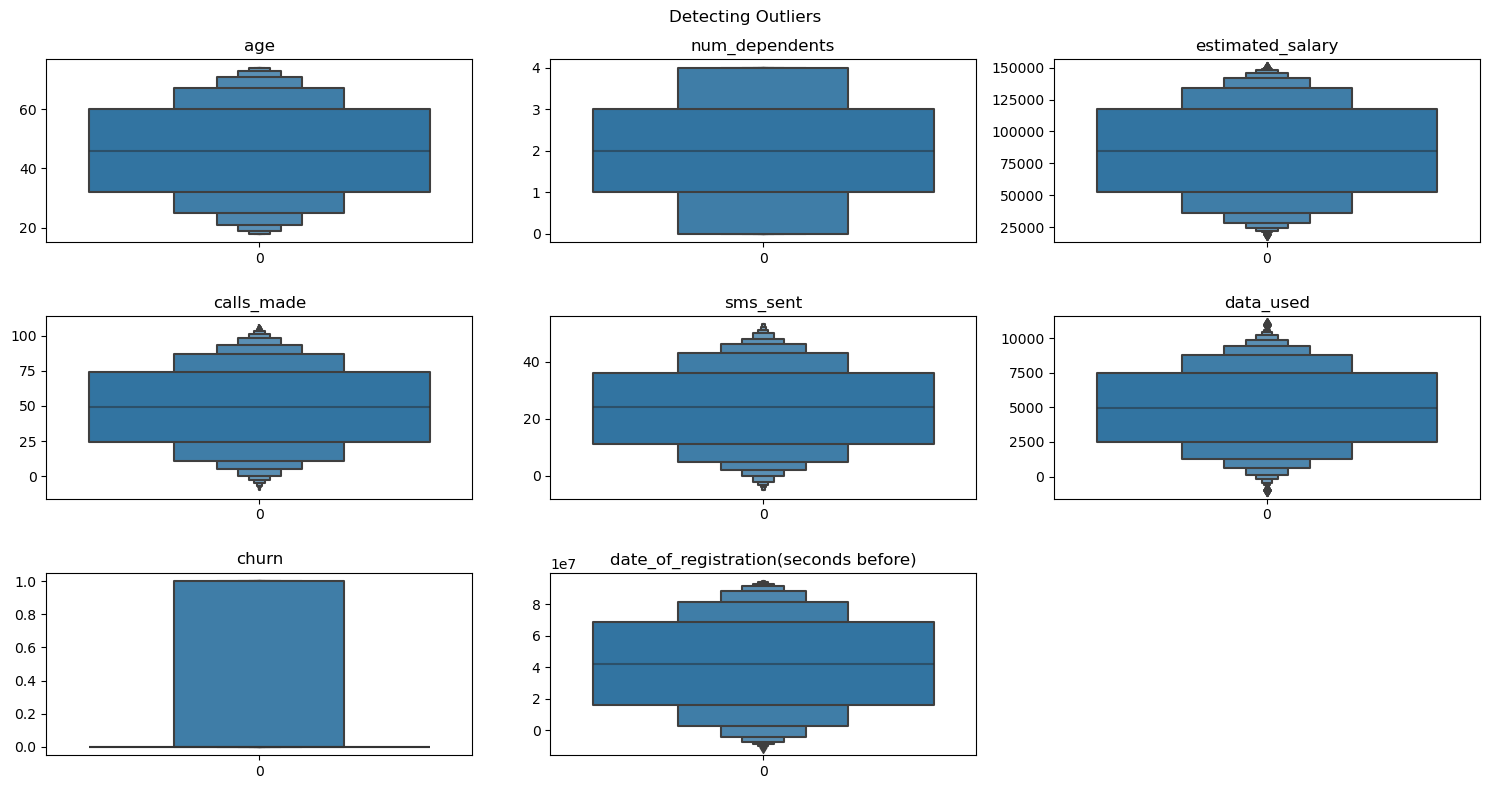

In [29]:
plt.figure(figsize=(15,8))
for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxenplot(df[var])
    plt.title(var)
    
plt.suptitle("Detecting Outliers")
plt.tight_layout()
plt.show()

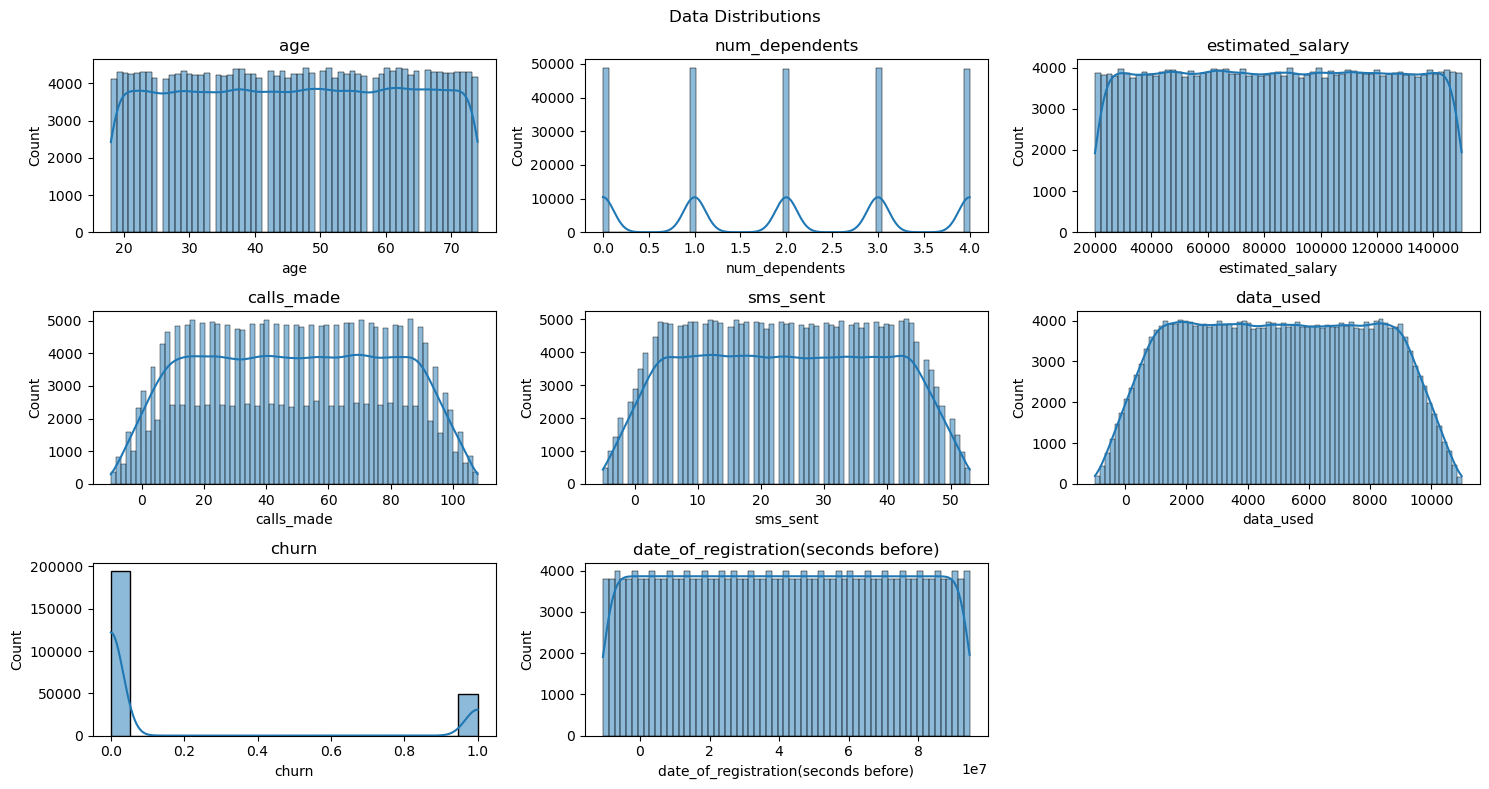

In [30]:
plt.figure(figsize=(15,8))
for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[var],kde=True)
    plt.title(var)
    
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

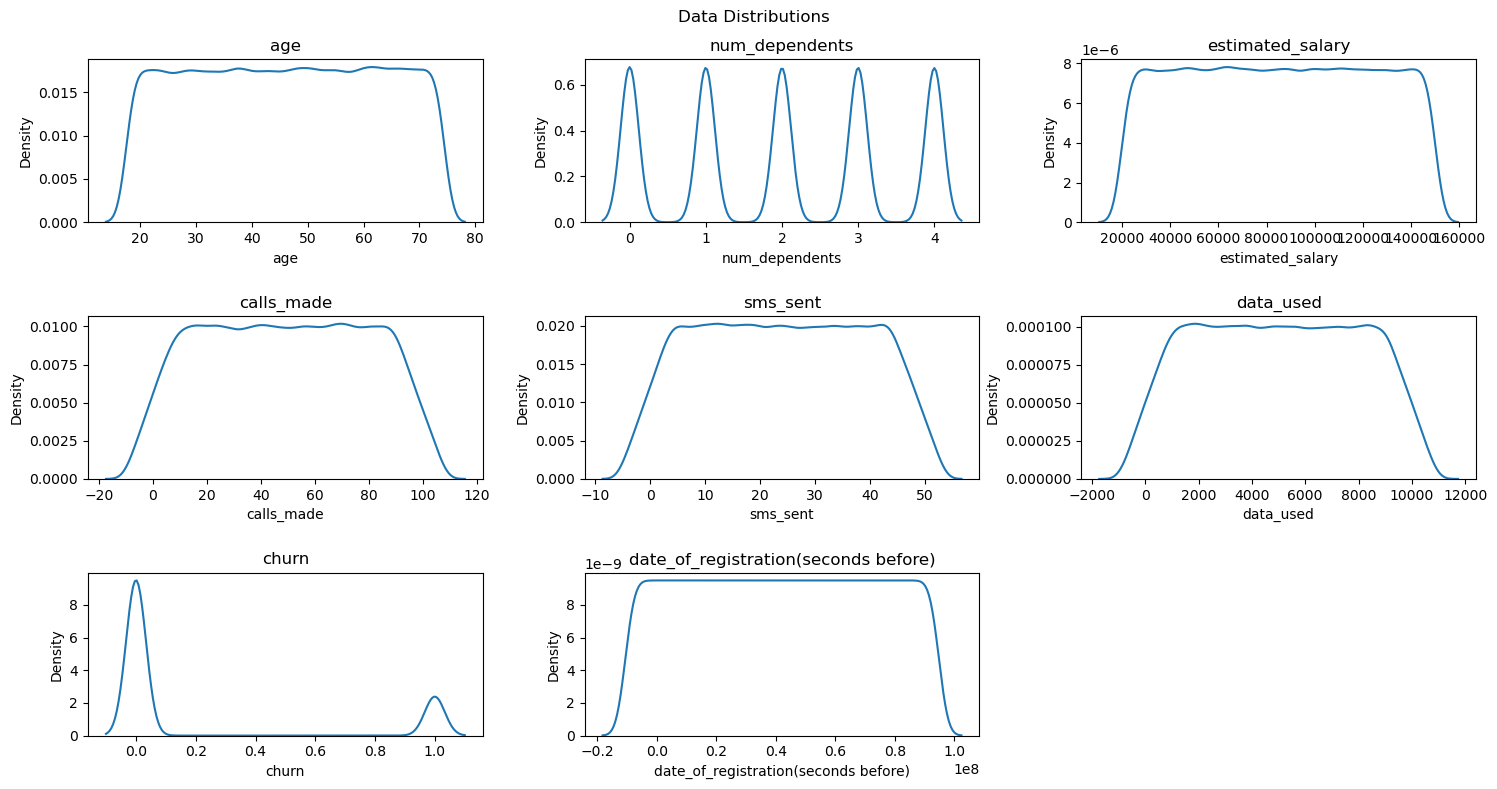

In [31]:
plt.figure(figsize=(15,8))
for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[var])
    plt.title(var)
    
plt.suptitle("Data Distributions")
plt.tight_layout()
plt.show()

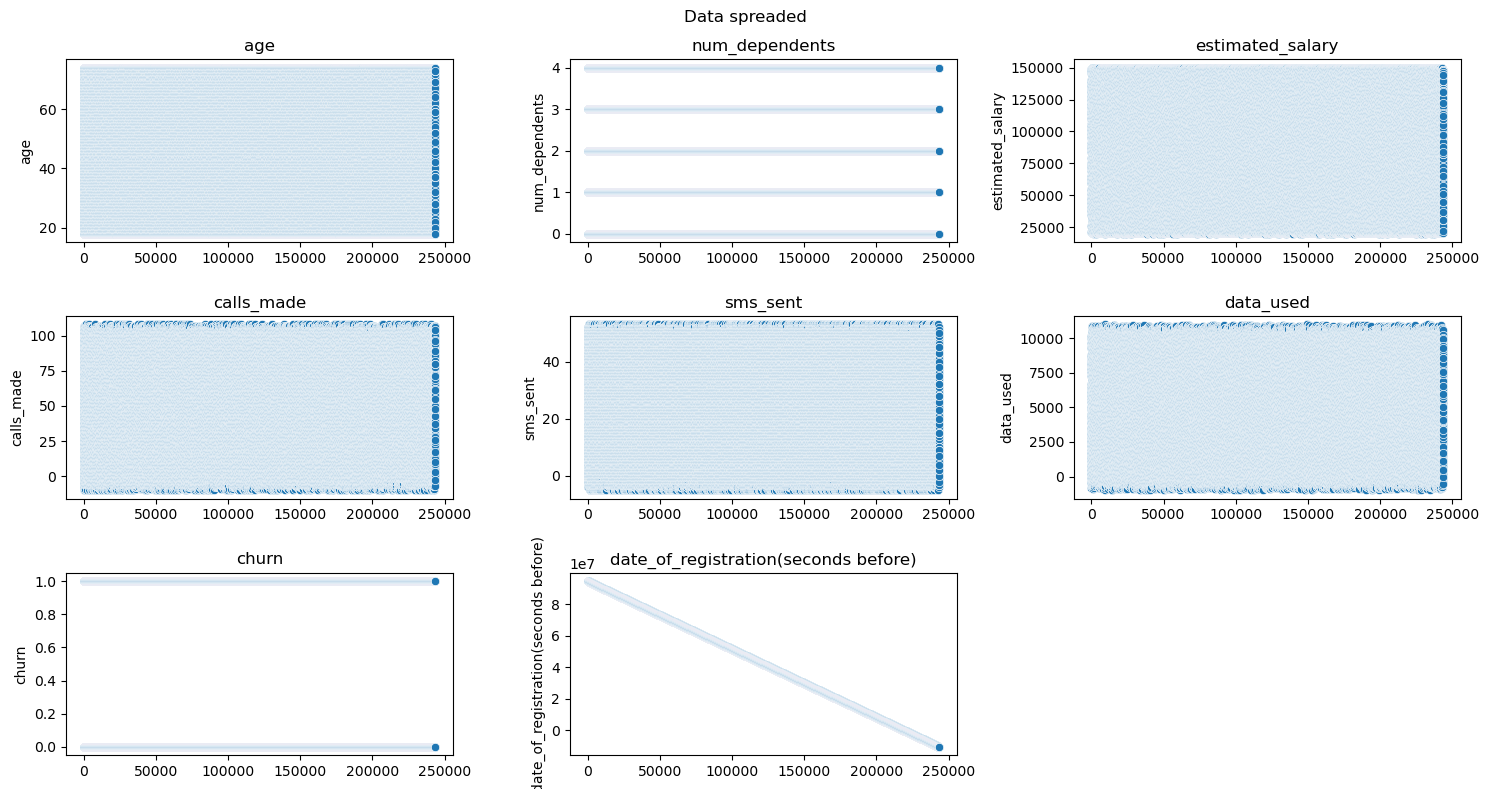

In [32]:
plt.figure(figsize=(15,8))
for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.scatterplot(df[var])
    plt.title(var)
    
plt.suptitle("Data spreaded")
plt.tight_layout()
plt.show()

In [33]:
df['telecom_partner'].value_counts().loc['Reliance Jio']

61123

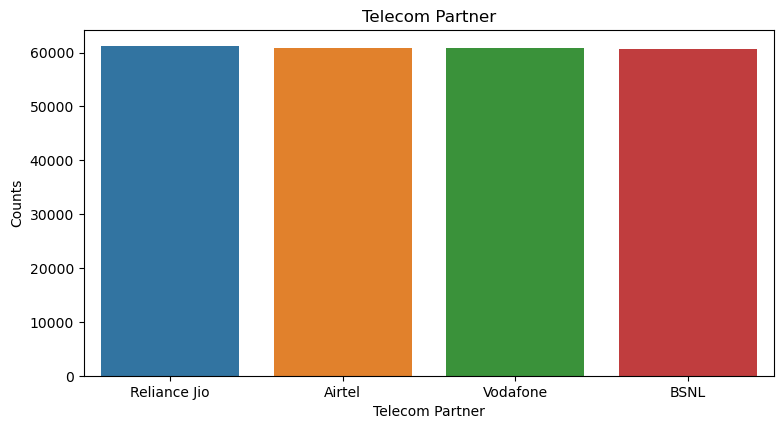

In [34]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.barplot(x=df['telecom_partner'].value_counts().index, y=df['telecom_partner'].value_counts())
plt.title('Telecom Partner')
plt.xlabel('Telecom Partner')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

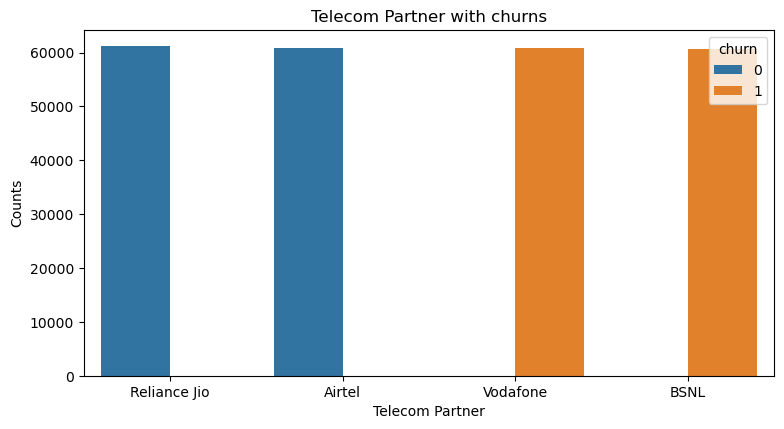

In [35]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
counts_df = df['telecom_partner'].value_counts().reset_index()
sns.barplot(x='index', y='telecom_partner', hue=df['churn'], data=counts_df)
plt.title('Telecom Partner with churns')
plt.xlabel('Telecom Partner')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

<Axes: xlabel='estimated_salary', ylabel='Count'>

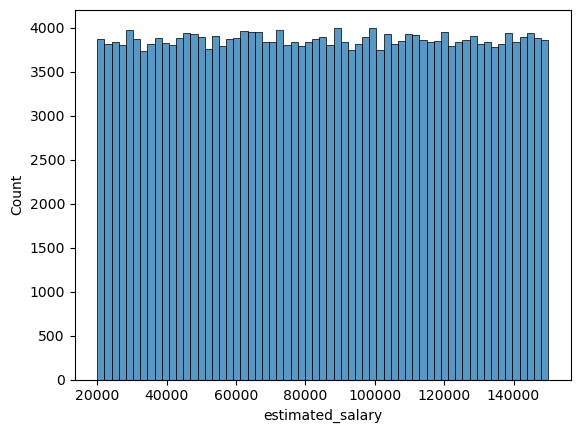

In [36]:
sns.histplot(df['estimated_salary'])

**3. Data Splitting**

In [37]:
X=df.drop(columns='churn')
y=df['churn']

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
onh=OneHotEncoder(drop="first",sparse_output=False)
sc=StandardScaler()

In [41]:
X_train.head()

,telecom_partner,gender,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,date_of_registration(seconds before)
115564,Vodafone,F,64,Karnataka,Chennai,1,129713,18,36,7659,44755200.0
166547,Vodafone,M,58,Mizoram,Kolkata,2,72721,20,36,4171,22723200.0
75863,BSNL,F,71,Bihar,Kolkata,3,116023,44,2,6484,61948800.0
169376,BSNL,M,44,Punjab,Mumbai,1,96438,91,37,6235,21513600.0
43195,Vodafone,M,38,Arunachal Pradesh,Delhi,3,34835,94,38,2256,76032000.0


In [42]:
tf1=ColumnTransformer(transformers=[
    ('onh',onh,[0,1,3,4]),
],remainder="passthrough")

tf2=ColumnTransformer(transformers=[
    ('stc',sc,slice(0,None)),
],remainder="passthrough")


In [43]:
pipe_lg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lg',LogisticRegression())
])

In [44]:
pipe_lg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lg', LogisticRegression())])

In [45]:
pipe_lg.score(X_train,y_train)

0.7995565644301325

In [46]:
y_pred_lg=pipe_lg.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_lg)*100

79.94416007445324

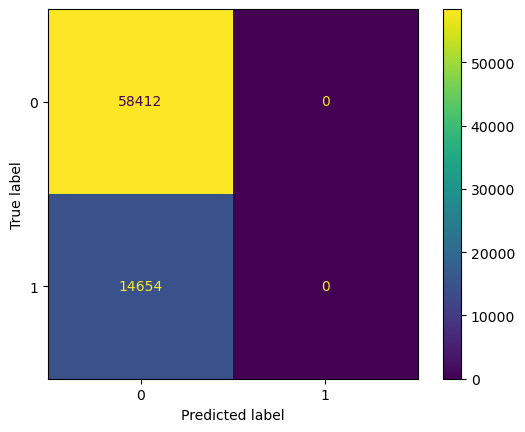

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lg)).plot()

In [49]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     58412
           1       0.00      0.00      0.00     14654

    accuracy                           0.80     73066
   macro avg       0.40      0.50      0.44     73066
weighted avg       0.64      0.80      0.71     73066



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**5. Improving our model**

In [50]:
lgr=LogisticRegression()
lgr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
# Step 2: Choose the hyperparameters to tune
hyperparameters = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [52]:
# Step 3: Define the performance metric
scoring = 'accuracy'

# Step 4: Perform hyperparameter search using grid search
gs_lr = GridSearchCV(LogisticRegression(), hyperparameters, scoring=scoring, cv=5)

pipe_gslr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_lr',gs_lr),
])

pipe_gslr.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = gs_lr.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [53]:
# Step 6: Train and evaluate the model with the best hyperparameters
log_reg=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lg',LogisticRegression(**best_params)),
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy:", accuracy*100)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Validation Accuracy: 79.94416007445324


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier,XGBRFClassifier

In [55]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgbc=XGBClassifier()

In [56]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [57]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [58]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred_dtc)

0.6696958913858703

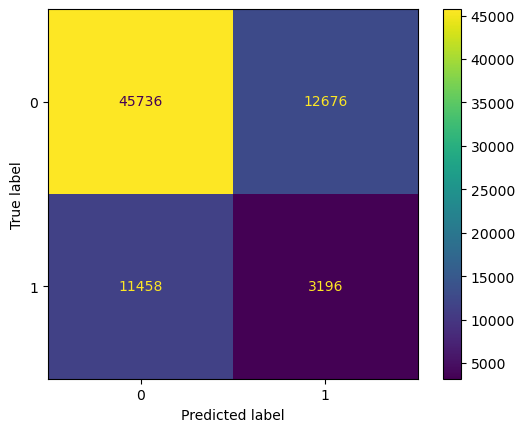

In [60]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

In [61]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     58412
           1       0.20      0.22      0.21     14654

    accuracy                           0.67     73066
   macro avg       0.50      0.50      0.50     73066
weighted avg       0.68      0.67      0.67     73066



In [62]:
pipe_xgb=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgb',xgbc)
])

In [63]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 3, 4])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('stc', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, cols...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [64]:
y_pred_xgbc=pipe_xgb.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred_xgbc)

0.7991952481318261

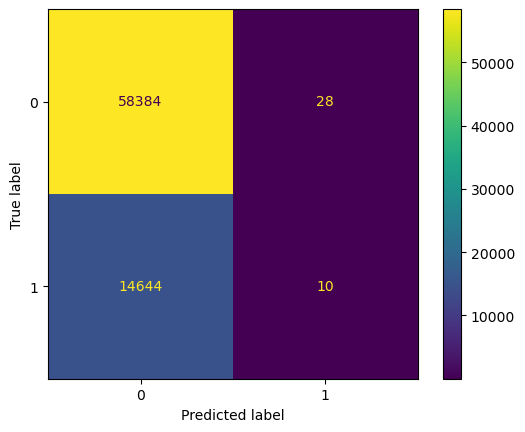

In [66]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgbc)).plot()

In [67]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     58412
           1       0.26      0.00      0.00     14654

    accuracy                           0.80     73066
   macro avg       0.53      0.50      0.44     73066
weighted avg       0.69      0.80      0.71     73066



**Implementing the ANN**

In [68]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [69]:
X_train_dummy=pd.get_dummies(X_train,drop_first=True)
X_test_dummy=pd.get_dummies(X_test,drop_first=True)

In [70]:
X_train_scaled=tf2.fit_transform(X_train_dummy)
X_test_scaled=tf2.transform(X_test_dummy)

In [71]:
X_train_scaled.shape,X_test_scaled.shape

((170487, 43), (73066, 43))

In [72]:
model=Sequential()

In [73]:
model.add(layers.Dense(64,activation='relu',input_dim=(43)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation='sigmoid'))

In [74]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [75]:
model.compile(loss=losses.binary_crossentropy,
             optimizer='adagrad',
             metrics=['accuracy'])

In [76]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test),callbacks=callback)

Epoch 1/10
5328/5328 [==============================] - 18s 3ms/step - loss: 0.6495 - accuracy: 0.6390 - val_loss: 0.5885 - val_accuracy: 0.7312
Epoch 2/10
5328/5328 [==============================] - 16s 3ms/step - loss: 0.5723 - accuracy: 0.7521 - val_loss: 0.5516 - val_accuracy: 0.7801
Epoch 3/10
5328/5328 [==============================] - 16s 3ms/step - loss: 0.5455 - accuracy: 0.7843 - val_loss: 0.5351 - val_accuracy: 0.7935
Epoch 4/10
5328/5328 [==============================] - 17s 3ms/step - loss: 0.5325 - accuracy: 0.7940 - val_loss: 0.5247 - val_accuracy: 0.7976
Epoch 5/10
5328/5328 [==============================] - 17s 3ms/step - loss: 0.5237 - accuracy: 0.7975 - val_loss: 0.5189 - val_accuracy: 0.7989
Epoch 6/10
5328/5328 [==============================] - 17s 3ms/step - loss: 0.5184 - accuracy: 0.7986 - val_loss: 0.5155 - val_accuracy: 0.7993
Epoch 7/10
5328/5328 [==============================] - 16s 3ms/step - loss: 0.5158 - accuracy: 0.7990 - val_loss: 0.5130 - val_ac

In [77]:
history.history['loss']

[0.6495404243469238,
 0.572265088558197,
 0.5455082058906555,
 0.5325252413749695,
 0.5237047672271729,
 0.5183848142623901,
 0.5158345699310303,
 0.513723611831665,
 0.5115858912467957,
 0.5109288692474365]

In [78]:
import matplotlib.pyplot as plt

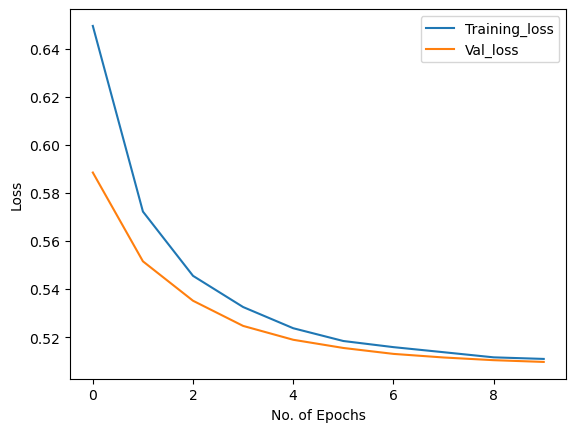

In [79]:
plt.plot(history.history['loss'],label="Training_loss")
plt.plot(history.history['val_loss'],label="Val_loss")
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.legend()

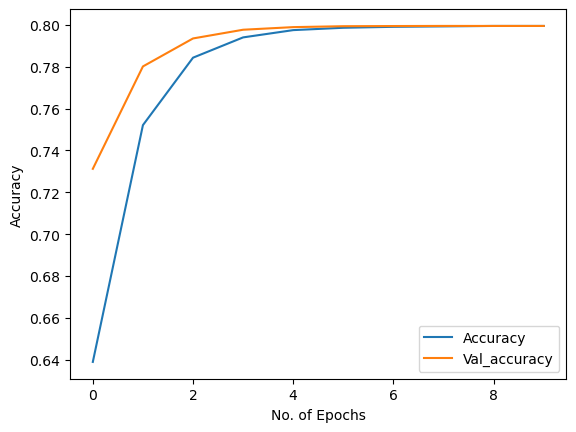

In [80]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history.history['val_accuracy'],label="Val_accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend()